<a href="https://colab.research.google.com/github/sakathia/DATA201/blob/main/DATA201_Project_3_Team_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project 3: Red Wine Quality in Portugal

##Introduction:
This dataset contains quality ratings for red variants of the Portuguese "Vinho Verde" wine, with data drawn from [Cortez et al., 2009]. It includes only physicochemical attributes (such as acidity, alcohol content, and sugar levels) and sensory quality scores. We selected this dataset because we were interested in exploring patterns in red wine quality and how it may be influenced by different chemical properties.

##Data Source:
Cortez, P., Cerdeira, A., Almeida, F., Matos, T., & Reis, J.
(2009). Wine Quality [Dataset]. UCI Machine Learning Repository.
https://doi.org/10.24432/C56S3T.          

https://archive.ics.uci.edu/dataset/186/wine+quality


https://www.semanticscholar.org/paper/Modeling-wine-preferences-by-data-mining-from-Cortez-Cerdeira/bf15a0ccc14ac1deb5cea570c870389c16be019c

In [ ]:
#importing the needed libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error as MSE



In [ ]:
#Loading and reading the dataset
orig_data = "/content/winequality-red.csv"
red_wine = pd.read_csv(orig_data, sep= ";")
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#Removing NAs
red_wine = red_wine.dropna()

In [ ]:
red_wine.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
red_wine.shape

(1599, 12)

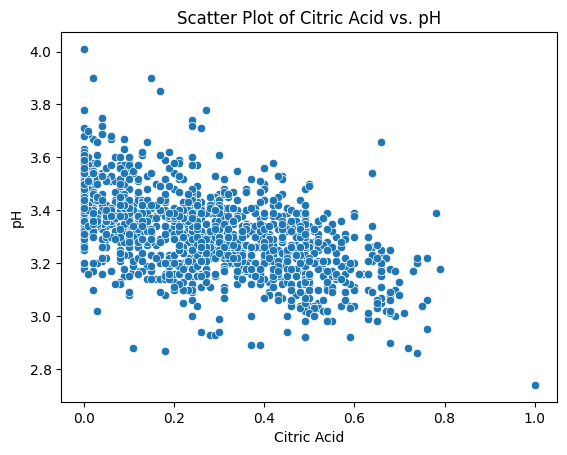

In [ ]:
sns.scatterplot(x="citric acid", y="pH", data=red_wine)
plt.title("Scatter Plot of Citric Acid vs. pH")
plt.xlabel("Citric Acid")
plt.ylabel("pH")
plt.show()

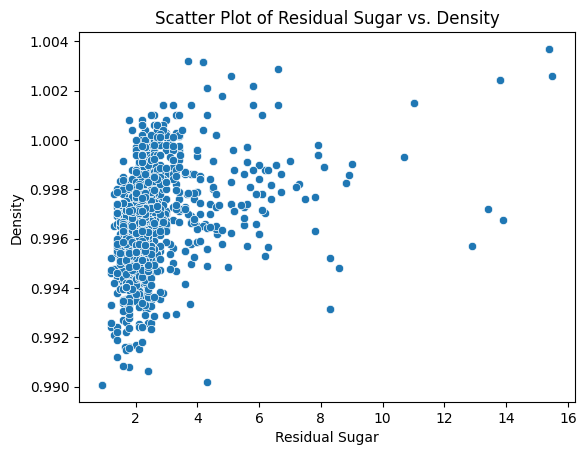

In [ ]:
sns.scatterplot(x="residual sugar", y="density", data=red_wine)
plt.title("Scatter Plot of Residual Sugar vs. Density")
plt.xlabel("Residual Sugar")
plt.ylabel("Density")
plt.show()

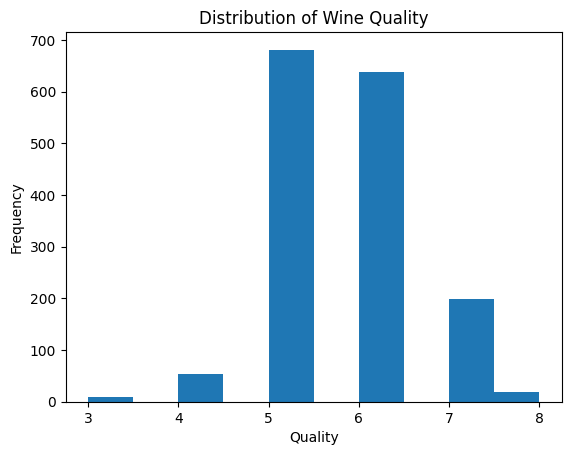

In [ ]:
plt.hist(red_wine["quality"])
plt.title("Distribution of Wine Quality")
plt.xlabel("Quality")
plt.ylabel("Frequency")
plt.show()

<ipython-input-6-15e26c5decf7>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=red_wine, x='quality', y='alcohol', palette='Purples')


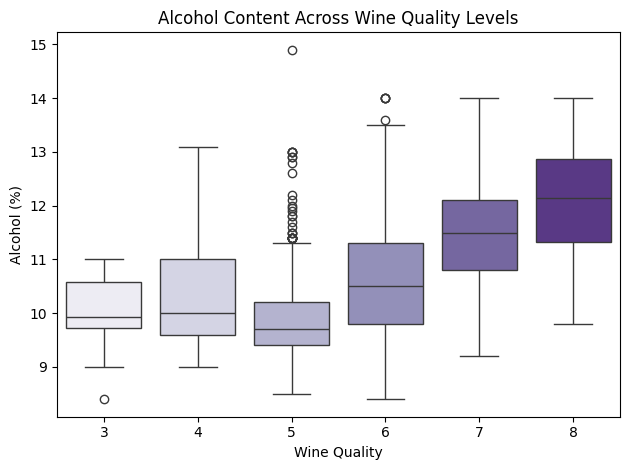

In [ ]:
sns.boxplot(data=red_wine, x='quality', y='alcohol', palette='Purples')
plt.title('Alcohol Content Across Wine Quality Levels')
plt.xlabel('Wine Quality')
plt.ylabel('Alcohol (%)')
plt.tight_layout()
plt.show()

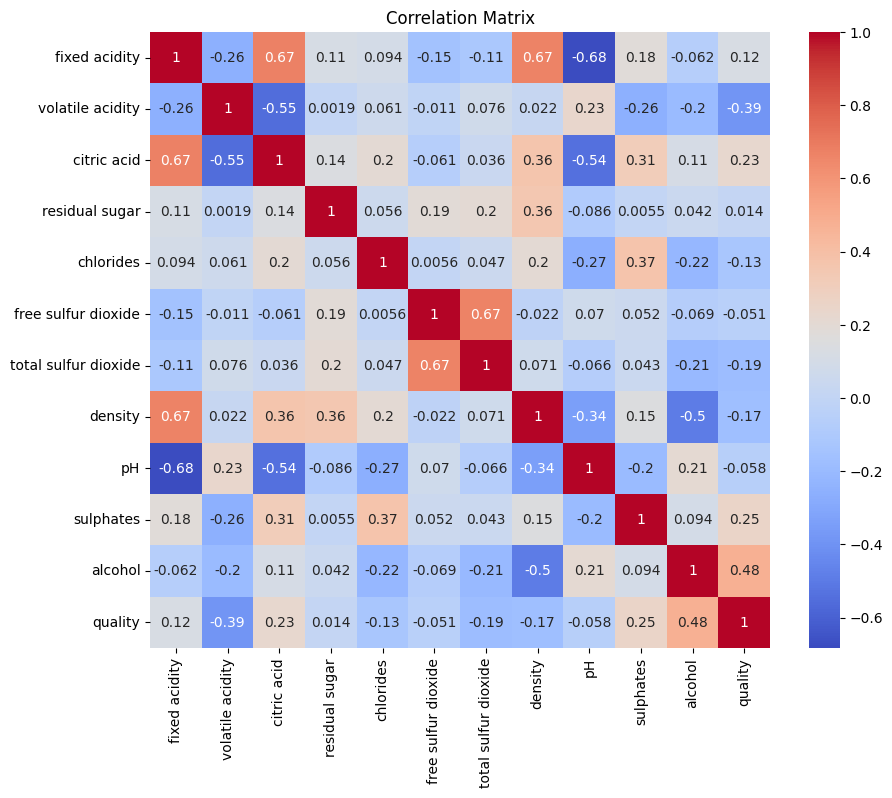

In [ ]:
# Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(red_wine.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

This heatmap displays Pearson correlation coefficients between every pair of variables in the red wine dataset.

Top correlations with wine quality:

Among the features analyzed, alcohol shows the strongest positive correlation with wine quality, with a correlation coefficient of +0.48, suggesting that wines with higher alcohol content tend to be rated better. Sulphates also have a mild positive relationship with quality (+0.25), indicating that higher sulphate levels may slightly improve wine quality. Citric acid has a smaller positive effect (+0.23), which could mean a subtle enhancement of flavor is linked to better quality. On the other hand, volatile acidity has a negative correlation of -0.39, meaning that higher acidity levels are generally associated with lower wine quality, likely due to a sharper, less pleasant taste. Also, other notable like : Alcohol vs density = -0.50: Wines with higher alcohol tend to be less dense.

pH vs fixed acidity = -0.68: Lower pH is linked to higher acidity — expected chemically.

To conclude, alcohol is a good predictor of the high-alcohol target and the strongest factor influencing wine quality.

This validates your model choice and supports the interpretability of your decision tree.

###  Decision Tree - Regression
The target is a continuous variable (e.g., price of a house)

CV RMSE: 0.52
Test RMSE: 0.53
Accuracy: 0.7188

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.68      0.68       213
           1       0.75      0.75      0.75       267

    accuracy                           0.72       480
   macro avg       0.72      0.71      0.72       480
weighted avg       0.72      0.72      0.72       480



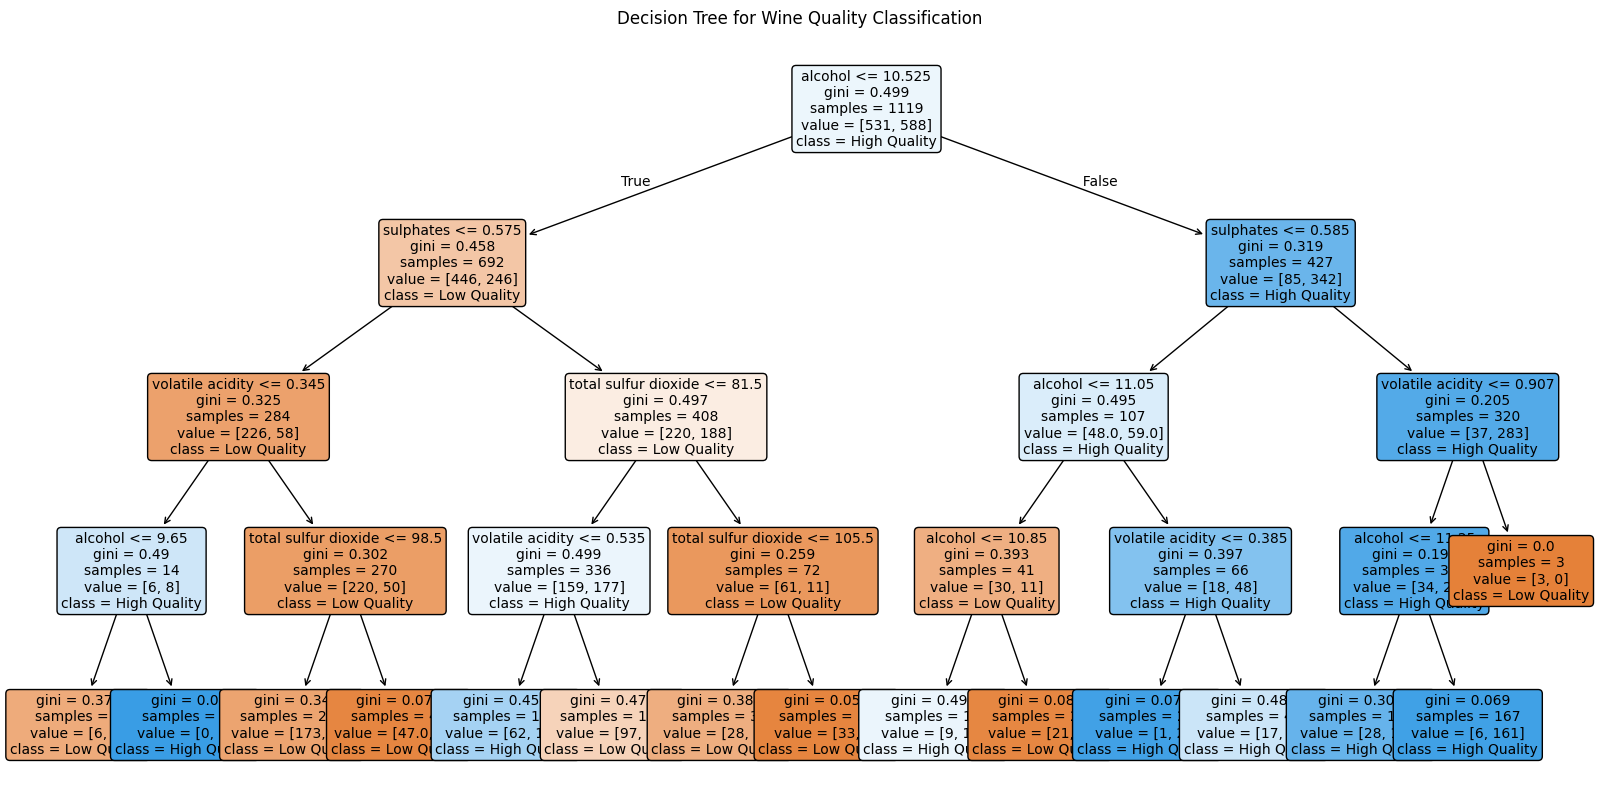

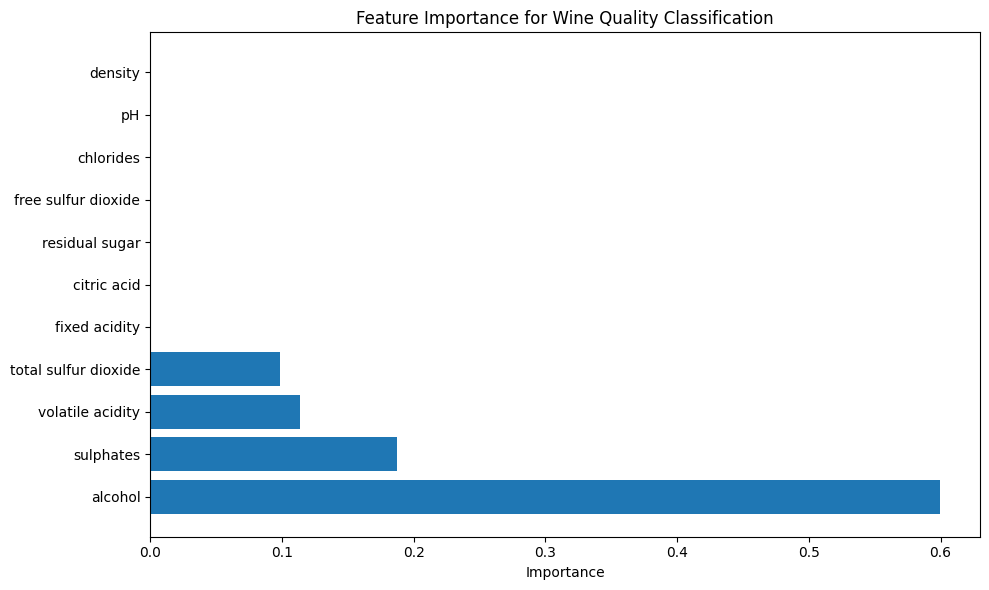

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score
from sklearn import tree
import matplotlib.pyplot as plt

red_wine['high_quality'] = (red_wine['quality'] >= 6).astype(int)

features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
            'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
            'density', 'pH', 'sulphates', 'alcohol']

X = red_wine[features]
y = red_wine['high_quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)
RMSE_CV = - cross_val_score(dt_model, X_train, y_train, scoring='neg_root_mean_squared_error', cv= 10)
#  RMSE for CV

print('CV RMSE: {:.2f}'.format(RMSE_CV.mean()))


# Test RMSE
print('Test RMSE: {:.2f}'.format(np.sqrt(MSE(y_test, y_pred))))


print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(20, 10))
tree.plot_tree(dt_model, feature_names=features, class_names=['Low Quality', 'High Quality'],
               filled=True, rounded=True, fontsize=10)
plt.title('Decision Tree for Wine Quality Classification')
plt.show()

feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': dt_model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance for Wine Quality Classification')
plt.tight_layout()
plt.show()

## Conclusion
Based on the results of the the root mean squared error for cross validation (CV RMSE) being 0.52 and the test RMSE being 0.53 we can say that since both values are close and have low variance, we can say that the decision tree regression is performing generally well, and that the model is not overfitting, and able to predict the quality of red wine generally well. In addition, as shown in the classification report the accuracy rate is at 71.88%.Then, based on our results, alcohol is the most important predictor for the quality of red wine based on the tree plot as wines with alcohol greater than 10.5% tend to have the highest quality on average. Then, other features such as volatile acidity, sulphate, total sulfur dioxide seems to provide another layer of quality prediction as shown in the Feature Importance for Wine Quality Classification Bar graph.